# Анализ игр
Нам передали данные об играх.

***Описание данных:*** CSV-файл с данными об играх. О качестве данных ничего неизвестно, так что понадобится провести их обзор и подготовку.

Описание столбцов датасета:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

***Цель исследования:*** Проанализировать данные, составить портрет пользователя и проверить некоторые гипотезы, которые помогут спрогнозировать продажи.

***Ход исследования:*** Планируется 6 этапов:
- Обзор данных
- Подготовка данных
- Исследовательский анализ данных
- Составление портрета пользователя каждого региона
- Проверка гипотез
- Общий вывод

In [2]:
# Импортируем необходимые библиотеки.
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

## Обзор данных

In [3]:
# Откроем фаил и изучим его.
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Отметим изначальное количество строк данных
data_starting_entries = data.shape[0]
data_starting_entries

16715

**Промежуточный вывод:** Видим данные об играх (название, платформа, год релиза, жанр), их продажах (в Северной Америке, Европе, Японии и других местах), оценки критиков, пользователей и возрастной рейтинг.

## Подготовка данных

In [6]:
# Приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Обработаем пропущенные значения.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Уберем строки с пропущенным названием, жанром и годом релиза.
# Это важные данные для анализа, а небольшим количеством пропусков
# можно принебречь.
data = data.dropna(subset = ['name', 'genre', 'year_of_release'])

In [9]:
# Заполним пропуски в critic_score.
# Так как причины отсутствия рейтинга могут быть разными,
# от нехватки/отсутствия обзоров до
# ошибки при переносе,
# корректно будет заменить оценку на какую-нибудь легко исключаемую
# при анализе данных, например -1.
data['critic_score'] = data['critic_score'].fillna(-1)

In [10]:
# Так же поступим и с user_score, но надо проверить значения в столбце.
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# Видим, что помимо "nan" есть еще "tbd" (to be determined) -
# видимо на момент составления таблицы данных для выставления оценки
# пользователей было недостаточно.

# Приведем пропуски к одному виду.
data['user_score'] = (data['user_score'].replace(['nan', 'tbd'], np.nan, regex=True))
# Заменим эти значения на -1.
data['user_score'] = data['user_score'].fillna(-1)

In [12]:
# Пропуски в столбце рейтинга обозначим как неизвестные значения, т.к.
# присвоить определенный рейтинг разным играм будет некорректно.
data['rating'] = data['rating'].fillna('unknown')

In [13]:
# Восстановим индексы.
data = data.reset_index(drop=True)

In [14]:
# Преобразуем данные в нужные типы:

# Год релиза - целое число.
data['year_of_release'] = data['year_of_release'].astype(int)

# Оценки критиков от 0 до 100 - тоже.
data['critic_score'] = data['critic_score'].astype(int)

# Оценки пользователей от 0 до 10 могут быть дробным числом.
data['user_score'] = data['user_score'].astype(float)

In [15]:
# Добавим столбец суммарных продаж во всех регионах.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


In [16]:
# Проверим, какая доля от изначального количества данных осталась после фильтрации.
data.shape[0] / data_starting_entries

0.9837870176488184

**Промежуточный вывод:** Количество данных от изначальных - 98.4%. Данные об оценках и возрастном рейтинге игр имели серьезное число пропусков, что может сказаться на анализе, несмотря на замену.

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [17]:
# Посмотрим, сколько игр было выпущено за каждый год.
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Промежуточный вывод:** С 1980 по 1994 год выпускалось гораздо меньше игр, чем после. При более подробном анализе эти данные можно либо объеденить в одну категорию, либо отбросить, что менее желательно.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
# Посмотрим, какую выручку принесла каждая платформа.
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Промежуточный вывод:** Видим, что наибольшие суммарные продажи были у PS2, следом идут платформы одного поколения X360, PS3 и Wii, затем предшественник Wii DS и предшественник PS2 PS. Меньше всего продаж у старых редких японских платформ, не ушедших далеко за пределы островного государства.

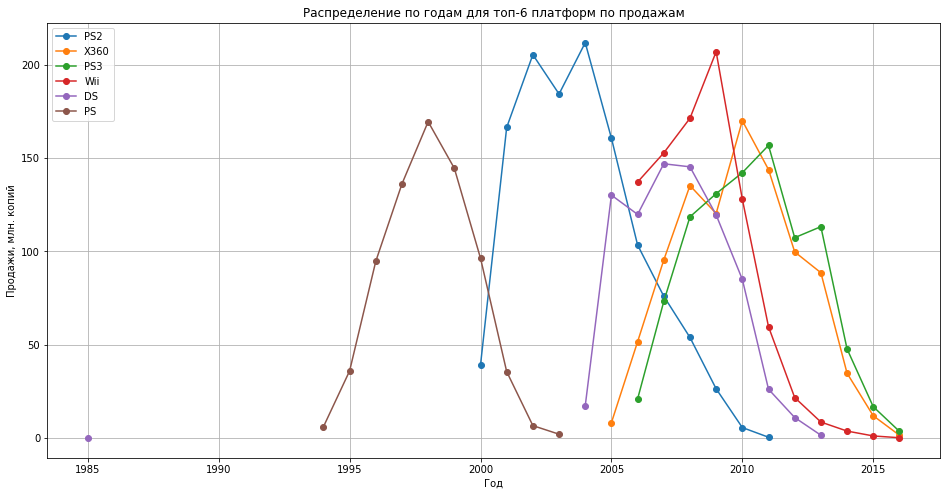

In [19]:
# Соберем данные в сводную таблицу.
platform_sales = data.pivot_table(index = 'year_of_release', values = 'total_sales', 
                                  columns = 'platform', aggfunc = 'sum')
# Построим график распределения по годам для топ-6 платформ по продажам.
# 6 платформ берем из-за небольшой разницы между 5 и 6 местом,
# в то время как между 6 и 7 местом разница по продажам уже почти в 2 раза.
plt.figure(figsize=(16, 8))
plt.plot(platform_sales['PS2'], marker = 'o', label = 'PS2')
plt.plot(platform_sales['X360'], marker = 'o', label = 'X360')
plt.plot(platform_sales['PS3'], marker = 'o', label = 'PS3')
plt.plot(platform_sales['Wii'], marker = 'o', label = 'Wii')
plt.plot(platform_sales['DS'], marker = 'o', label = 'DS')
plt.plot(platform_sales['PS'], marker = 'o', label = 'PS')
plt.title('Распределение по годам для топ-6 платформ по продажам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.legend(loc='upper left')
plt.show()

**Промежуточный вывод:** Видим, что цикл существования платформ с наибольшими продажами составил примерно 10 лет. Стоит учитывать, что на этот цикл оказывают непосредственное влияние сами разработчики платформ, постепенно вводя в эксплуатацию новые платформы и выводя старые.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

In [20]:
# Возьмем актуальный период 4 года - с 2013 по 2016 год.
# Таким образом мы охватим все платформы на подъеме и отсечем большинство
# отживших срок, учитывая при этом
# более свежие данные о конце срока некоторых платформ.
data_rel = data.query('year_of_release >= 2013')

# Так же уберем платформы, у которых нет данных о продажах за 2016 год.
# Обычно выпуск и продажа игр на таких платформах не возобновляется.
data_plat = data_rel.query('year_of_release >= 2016')['platform']
data_rel = data_rel.query('platform in @data_plat')
data_rel.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

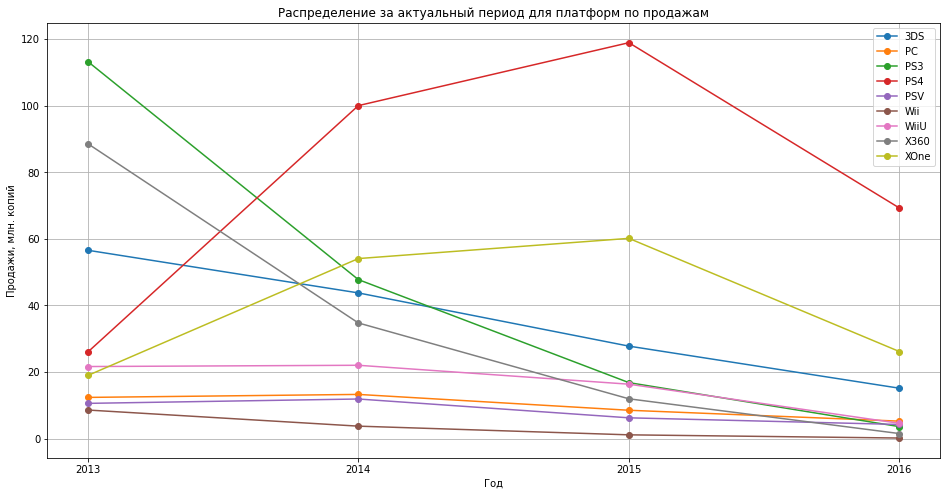

In [48]:
# Соберем данные в сводную таблицу.
platform_sales_rel = data_rel.pivot_table(index = 'year_of_release', values = 'total_sales', 
                                          columns = 'platform', aggfunc = 'sum')
# Построим график распределения за актуальный период для платформ по продажам.
plt.figure(figsize=(16, 8))
# Так как в этот раз мы не знаем названия платформ заранее, воспользуемся циклом.
for col in platform_sales_rel.columns:
    plt.plot(platform_sales_rel.loc[:, col], marker="o", label=col)
plt.xticks(plt.xticks()[0][1::2])
plt.title('Распределение за актуальный период для платформ по продажам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.legend(loc='upper right')
plt.show()

**Промежуточный вывод:** Судя по графику, лидерами продаж за актуальный период являются PS4, XOne и 3DS. Роста продаж по состоянию на 2016 год на графике не наблюдается, однако стоит учитывать, что данные за 2016 год неполные. Скорее всего, PS4 и XOne приближаются к пику своего цикла. Разумно ориентироваться на них в плане прибыльности.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

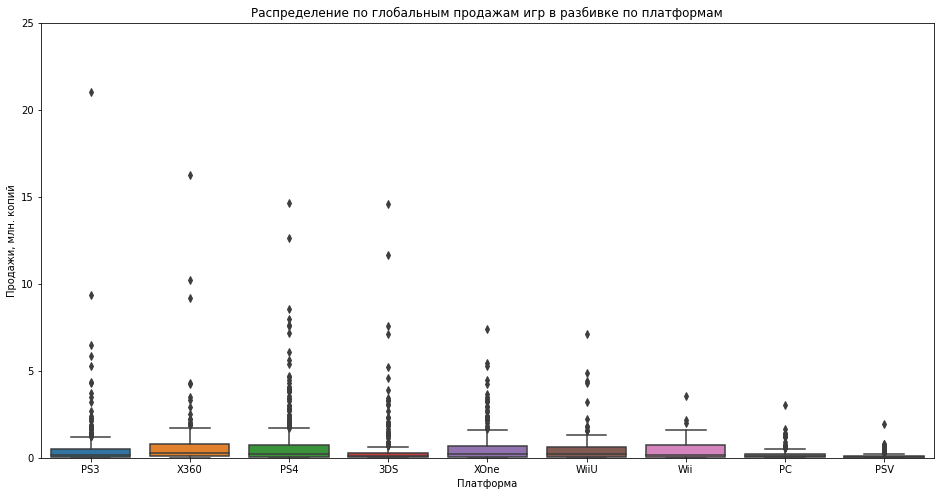

In [22]:
# Построим график.
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=data_rel)
plt.ylim(0, 25)
plt.title('Распределение по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.show()

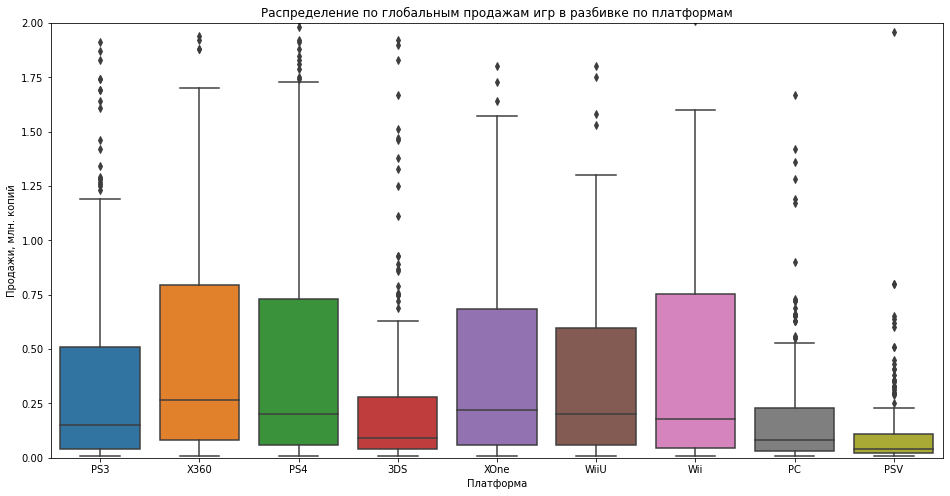

In [23]:
# Рассмотрим поближе.
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=data_rel)
plt.ylim(0, 2)
plt.title('Распределение по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.show()

**Промежуточный вывод:** Видим смещение медиан к нижнему квартилю у всех платформ, что означает, что на них выходит много игр с небольшими продажами. Выбросы вверх вполне объяснимы бестселлерами, тогда как близость нижнего "уса" к 0 объяснима не только провальными играми, но и нишевыми или региональными продуктами.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [24]:
# Рассмотрим данные для платформы PS4 как самой перспективной
# судя по графику за актуальный период.
data_PS4 = data_rel.query('platform == "PS4"')
data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66


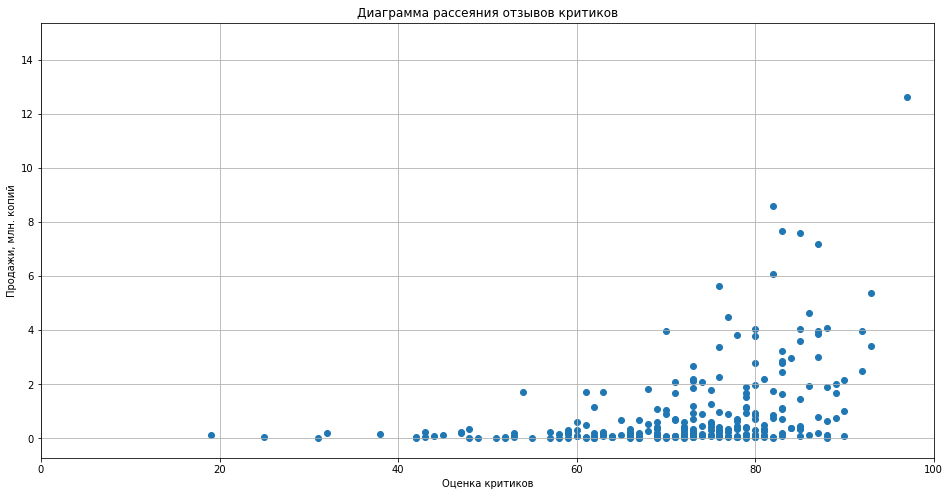

In [25]:
# Построим диаграмму рассеяния отзывов критиков.
plt.figure(figsize=(16, 8))
plt.scatter(x='critic_score', y='total_sales', data=data_PS4)
plt.xlim(0, 100)
plt.title('Диаграмма рассеяния отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show()

**Промежуточный вывод:** Видим, что с увеличением оценки критиков, игры чаще продаются большим тиражом.

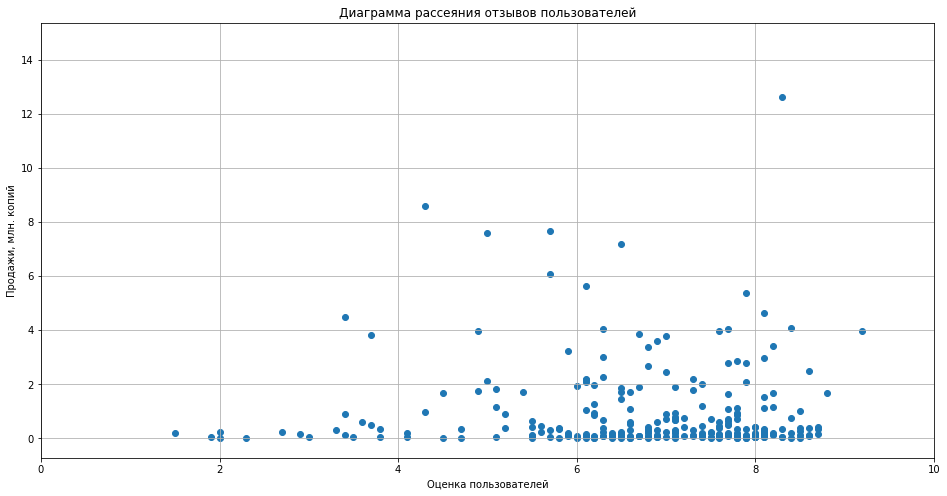

In [26]:
# Построим диаграмму рассеяния отзывов пользователей.
plt.figure(figsize=(16, 8))
plt.scatter(x='user_score', y='total_sales', data=data_PS4)
plt.xlim(0, 10)
plt.title('Диаграмма рассеяния отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн. копий')
plt.grid()
plt.show()

**Промежуточный вывод:** А вот оценка пользователей уже не сказывается на продажах.

In [27]:
# Для подсчета корреляции уберем отрицательные значения,
# которые мы подставляли вместо пропусков.
data_PS4_crit = data_PS4[(data_PS4['critic_score'] != -1)]
data_PS4_user = data_PS4[(data_PS4['user_score'] != -1)]

In [28]:
# Посчитаем корреляцию для обоих случаев.
crit_corr = data_PS4_crit['total_sales'].corr(data_PS4_crit['critic_score'])
user_corr = data_PS4_user['total_sales'].corr(data_PS4_user['user_score'])
print(f'Корреляция между оценками критиков и числом продаж игр равна {crit_corr.round(3)}')
print(f'Корреляция между оценками пользователей и числом продаж игр равна {user_corr.round(3)}')

Корреляция между оценками критиков и числом продаж игр равна 0.407
Корреляция между оценками пользователей и числом продаж игр равна -0.032


**Промежуточный вывод:** Корреляция в 0.4 говорит о наличии связи между оценками критиков и количеством продаж, однако не слишком сильной. В то же время корреляция около 0 говорит об отсутствтии связи между оценками пользователей и количеством продаж.

### Соотнесите выводы с продажами игр на других платформах.

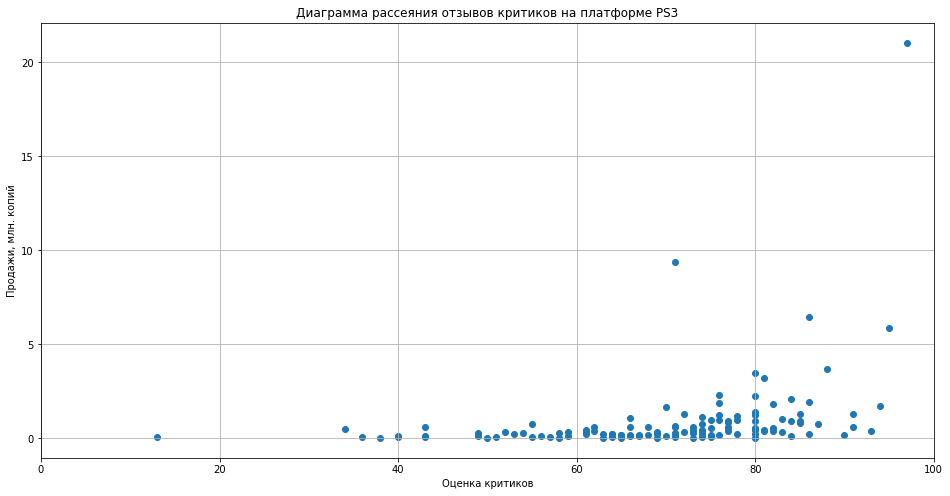

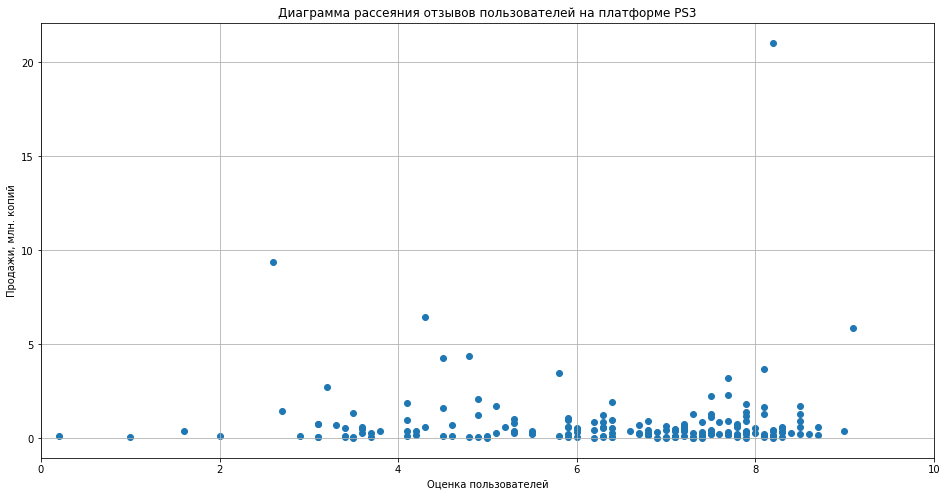

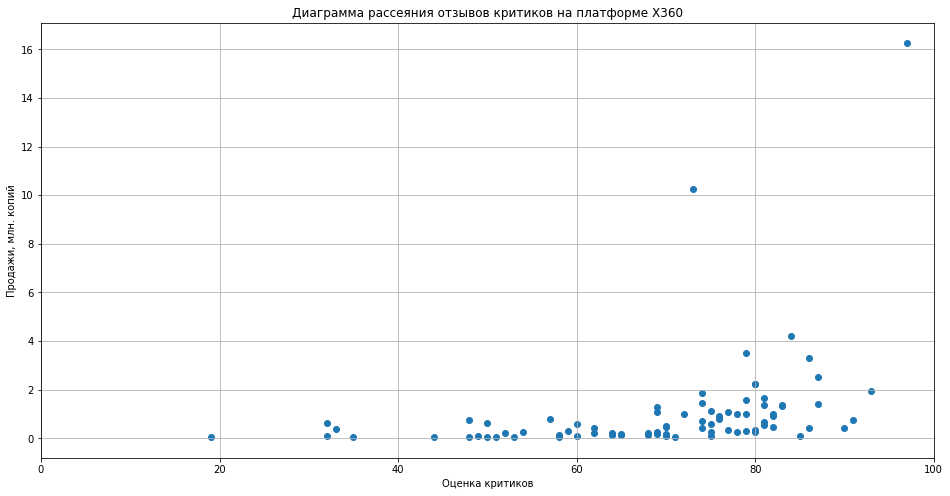

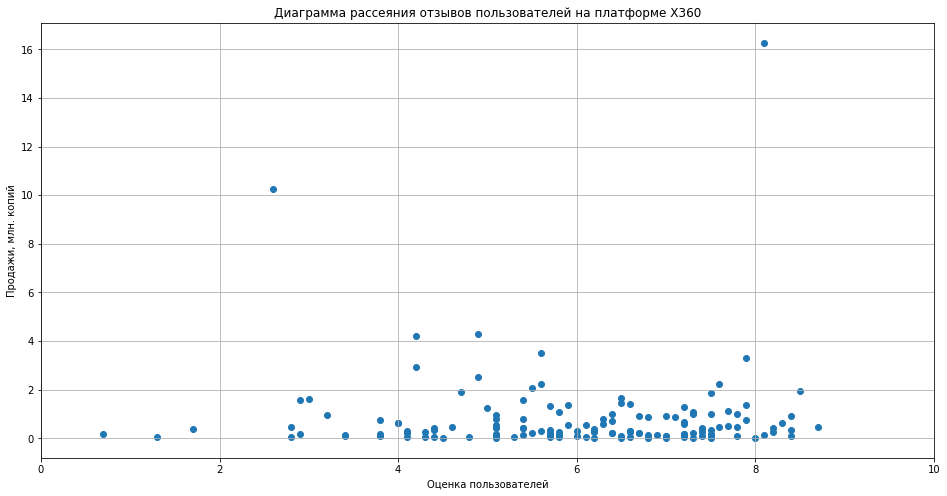

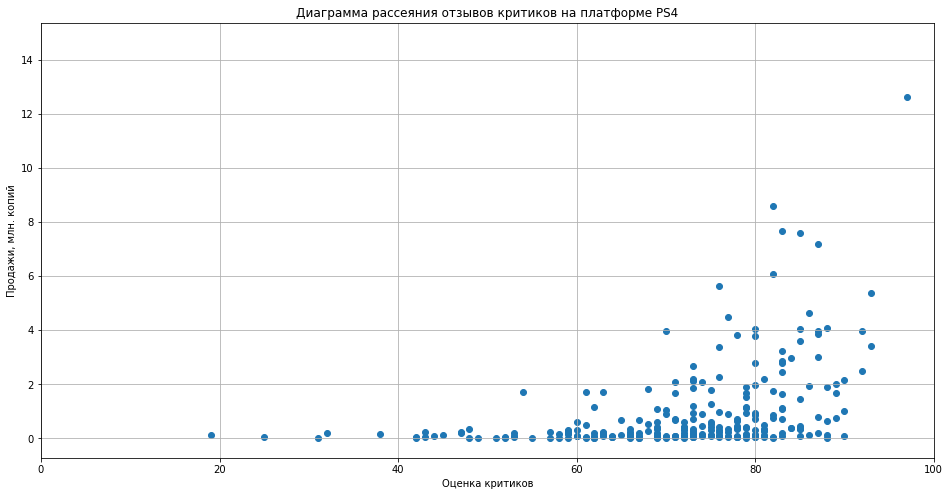

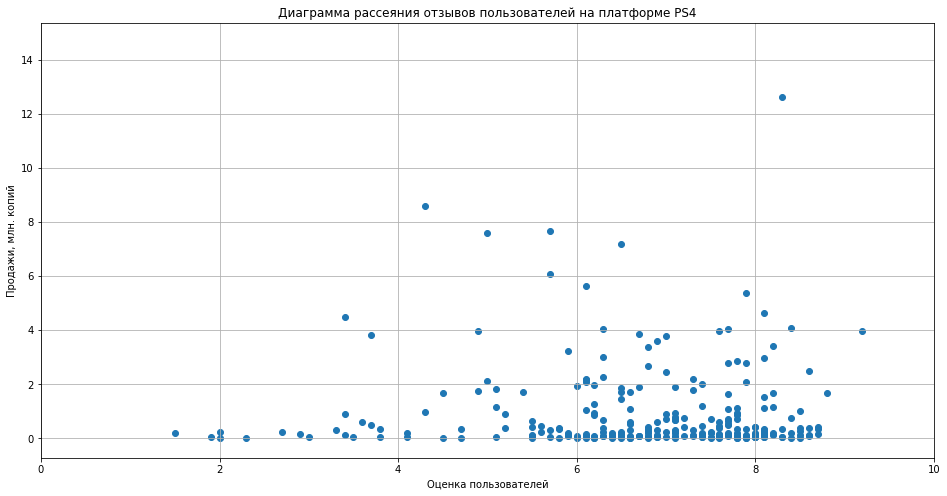

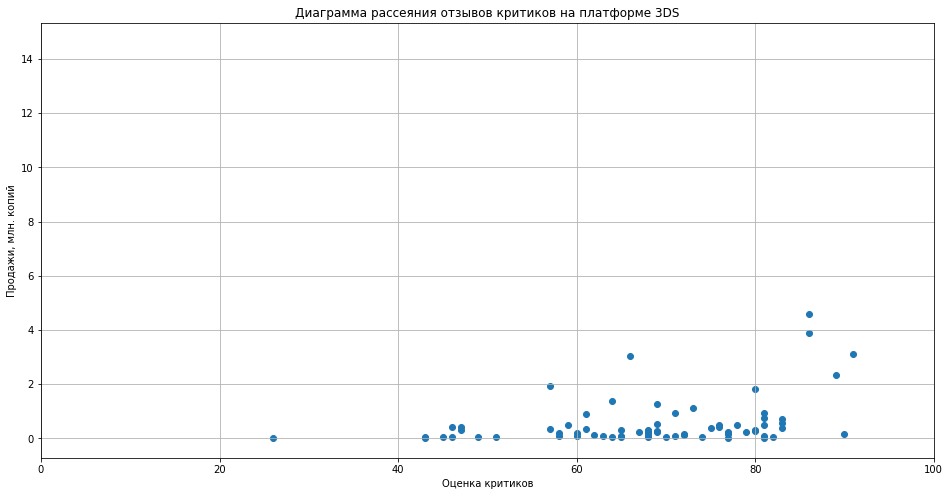

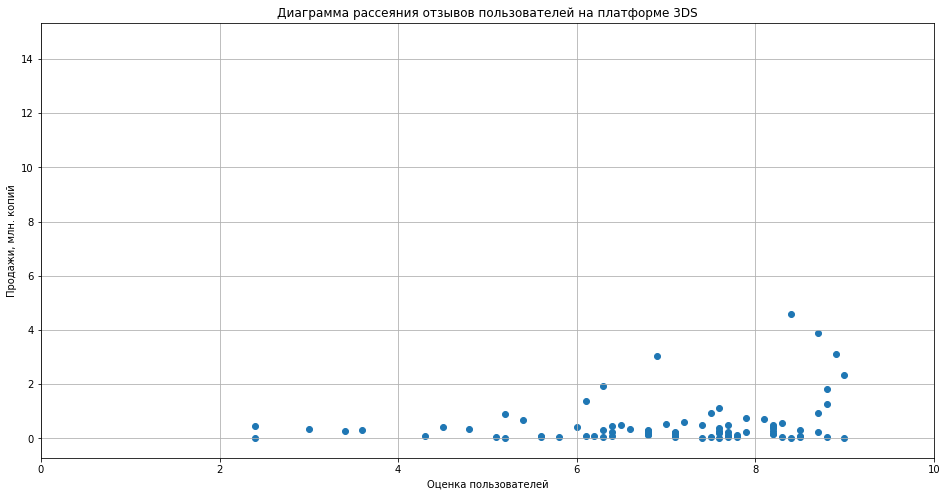

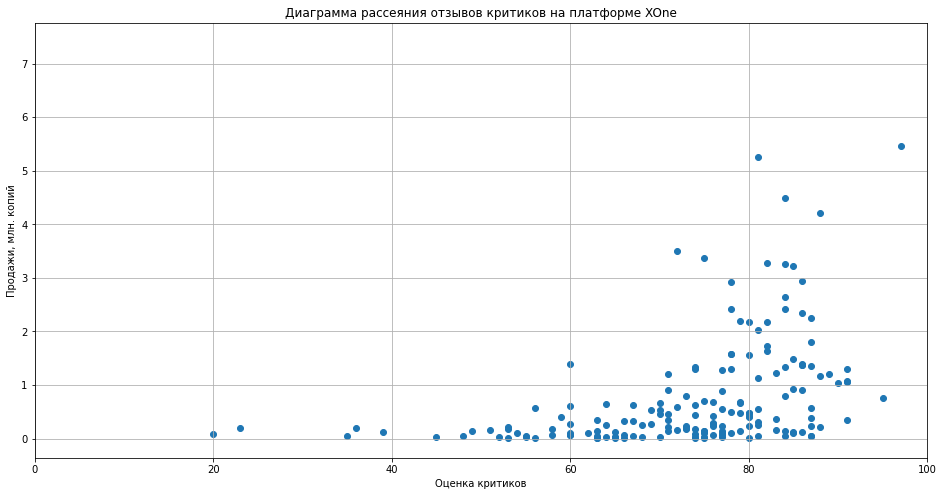

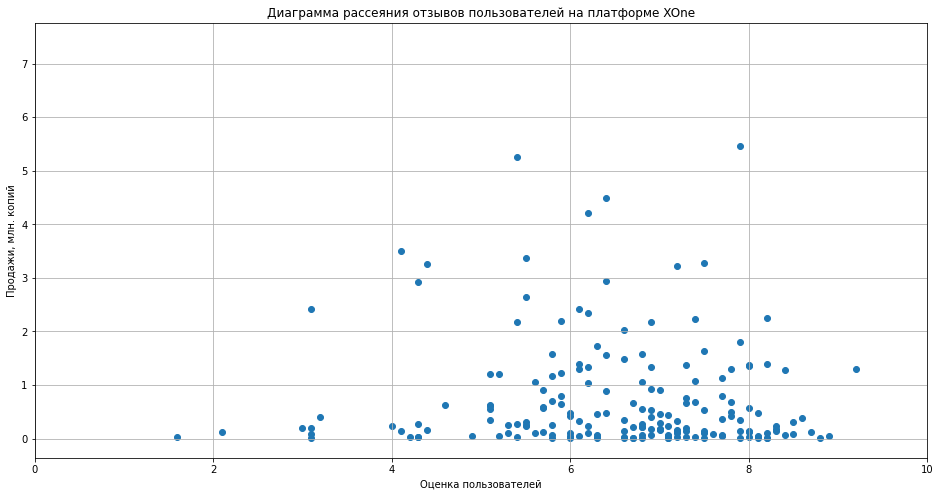

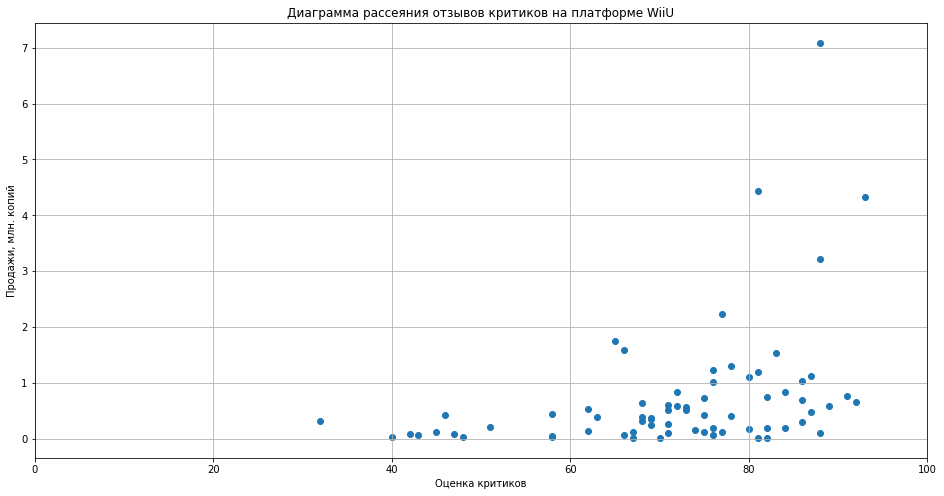

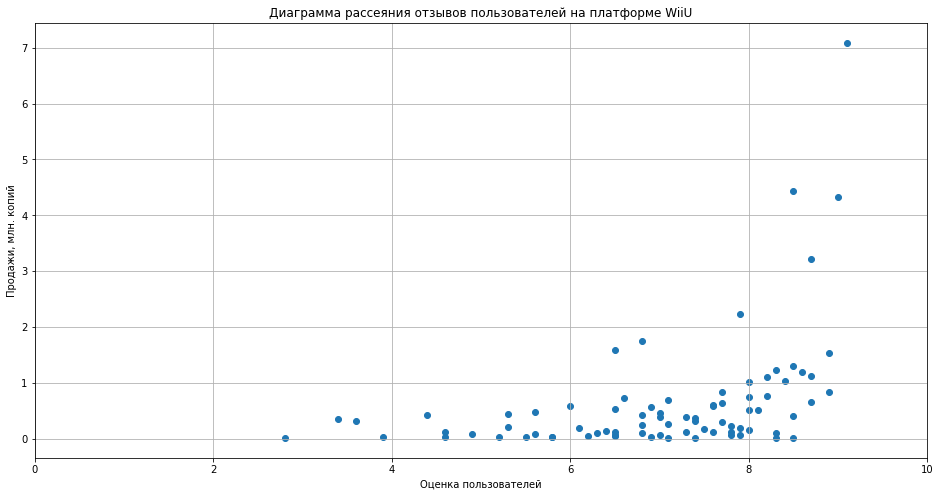

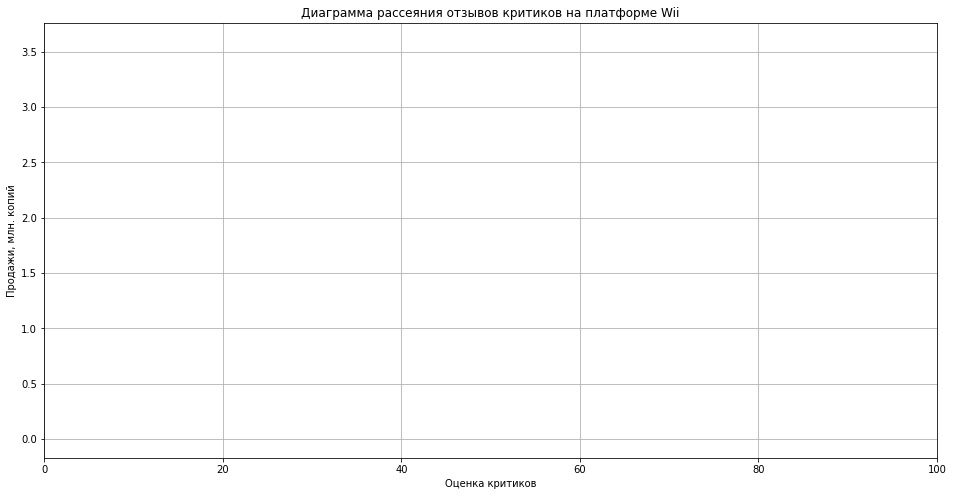

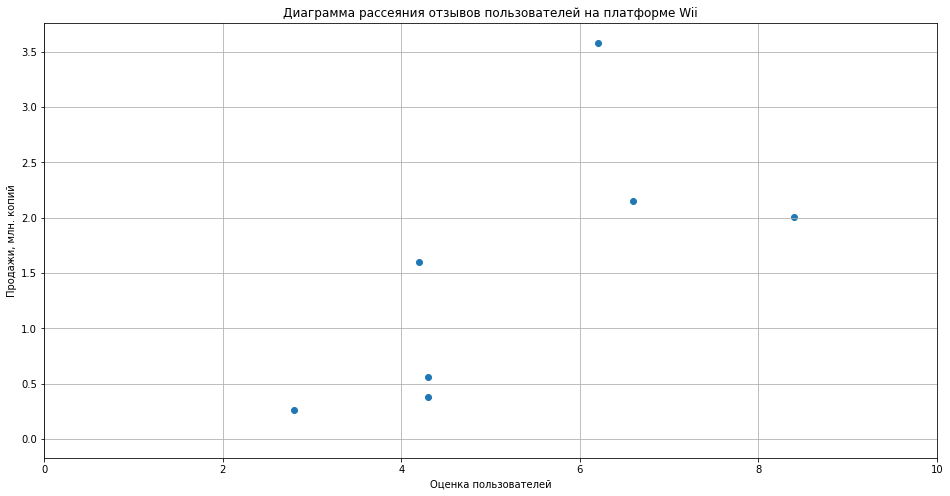

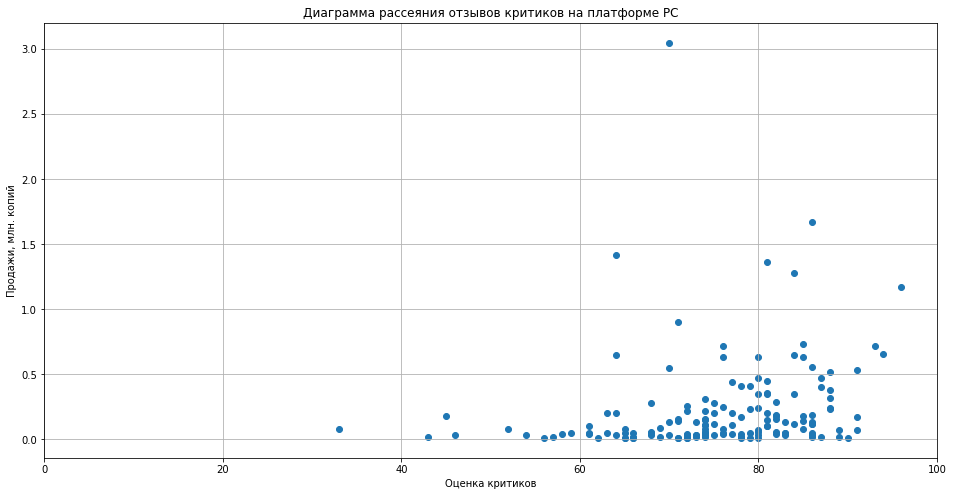

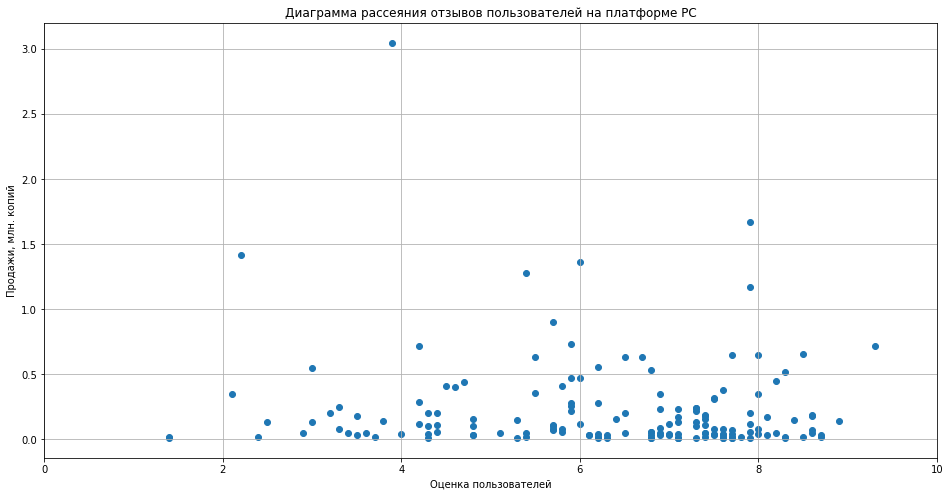

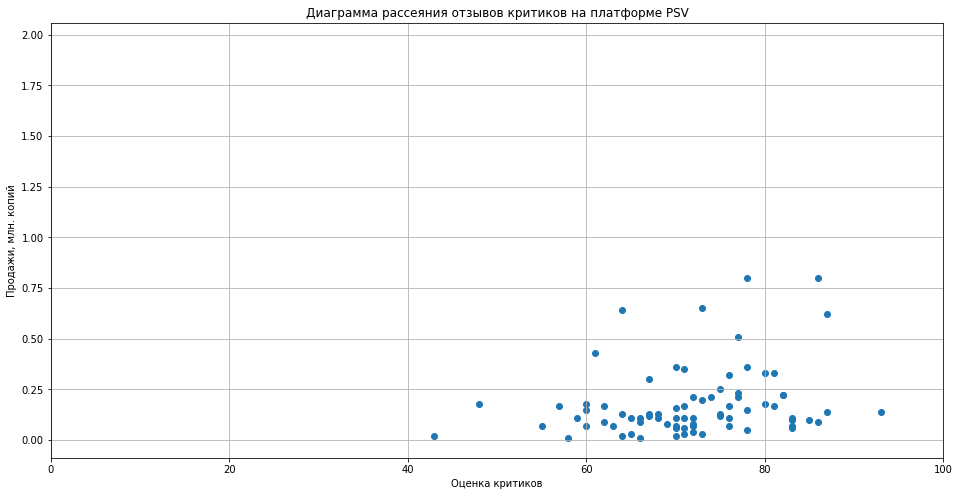

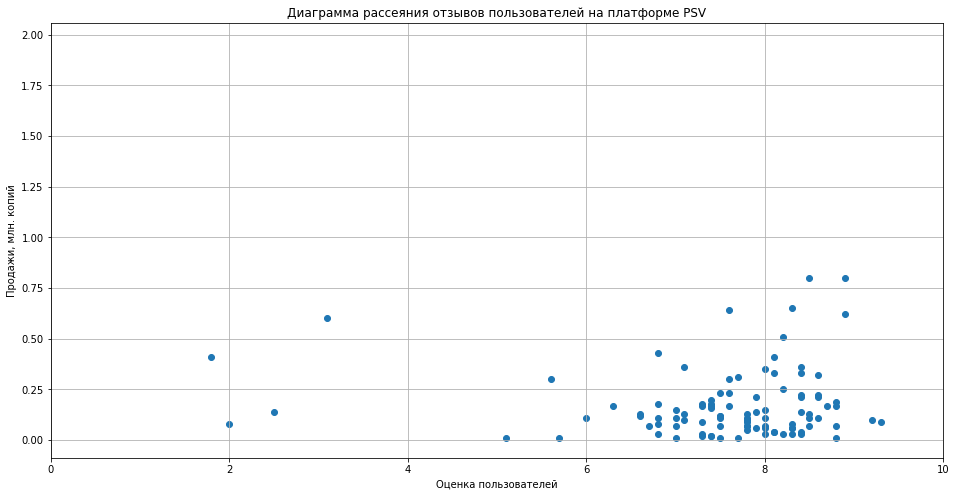

In [29]:
# Используем цикл для диаграмм рассеивания.
for platform in data_rel['platform'].unique():
    data = data_rel.query('platform == @platform')
    
    plt.figure(figsize=(16, 8))
    plt.scatter(x='critic_score', y='total_sales', data=data)
    plt.xlim(0, 100)
    plt.title(f'Диаграмма рассеяния отзывов критиков на платформе {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн. копий')
    plt.grid()
    plt.figure(figsize=(16, 8))
    plt.scatter(x='user_score', y='total_sales', data=data)
    plt.xlim(0, 10)
    plt.title(f'Диаграмма рассеяния отзывов пользователей на платформе {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн. копий')
    plt.grid()
    plt.show()

In [30]:
# Для подсчета корреляции уберем отрицательные значения,
# которые мы подставляли вместо пропусков.
data_crit = data_rel.query('critic_score != -1')
data_user = data_rel.query('user_score != -1')

# Посчитаем корреляцию для платформ.
for platform in data_crit['platform'].unique():
    d = data_crit.query('platform == @platform')['total_sales'].corr(data_crit['critic_score'])
    print(f'Корреляция между оценками критиков и числом продаж игр на платформе {platform} равна: {d.round(3)}')
    
for platform in data_user['platform'].unique():
    d = data_user.query('platform == @platform')['total_sales'].corr(data_user['user_score'])
    print(f'Корреляция между оценками пользователей и числом продаж игр на платформе {platform} равна: {d.round(3)}')

Корреляция между оценками критиков и числом продаж игр на платформе PS3 равна: 0.334
Корреляция между оценками критиков и числом продаж игр на платформе X360 равна: 0.35
Корреляция между оценками критиков и числом продаж игр на платформе PS4 равна: 0.407
Корреляция между оценками критиков и числом продаж игр на платформе WiiU равна: 0.376
Корреляция между оценками критиков и числом продаж игр на платформе XOne равна: 0.417
Корреляция между оценками критиков и числом продаж игр на платформе 3DS равна: 0.357
Корреляция между оценками критиков и числом продаж игр на платформе PC равна: 0.196
Корреляция между оценками критиков и числом продаж игр на платформе PSV равна: 0.255
Корреляция между оценками пользователей и числом продаж игр на платформе PS3 равна: 0.002
Корреляция между оценками пользователей и числом продаж игр на платформе X360 равна: -0.012
Корреляция между оценками пользователей и числом продаж игр на платформе PS4 равна: -0.032
Корреляция между оценками пользователей и числ

**Промежуточный вывод:** Вывод корреляции между оценками и числом продаж игр на топовых платформах дает нам интересные результаты. В целом корреляция между оценками критиков и числом продаж игр примерно одинакова и говорит о слабой, но присутствующей взаимосвязи между отзывами и продажами. Однако PC является исключением, корреляция там заметно ближе к 0, то есть влияния почти нет.

Корреляция между оценками пользователей и числом продаж игр на топовых платформах в целом близка к 0, что говорит об отсутствии влияния на продажи. Однако платформы Wii, 3DS и WiiU являются исключениями, корреляция там заметно дальше от 0, что говорит о наличии влияния оценок пользователей на продажи.

Оба случая являются интересными еще и по той причине, что, как правило, обзоры критиков появляются до начала продаж, а обзоры пользователей - после, причем пользователь перед этим как правило приобретает копию игры.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [31]:
# Посмотрим, сколько игр было выпущено в каждом жанре.
data_rel.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          752
Role-Playing    285
Adventure       211
Sports          208
Shooter         187
Misc            146
Racing           85
Fighting         79
Platform         72
Simulation       61
Strategy         55
Puzzle           17
Name: name, dtype: int64

In [32]:
# Посмотрим, какую выручку принес каждый конкретный жанр.
# Возьмем медиану для каждого жанра из-за выбросов в виде блокбастеров.
data_rel.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.250
Platform        0.225
Fighting        0.130
Role-Playing    0.120
Racing          0.120
Misc            0.115
Action          0.110
Simulation      0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

**Промежуточный вывод:** Лидером по медианной прибыли за игру является жанр Shooter, за ним идет Sports, затем Platform. Выделяются и аутсайдеры: наихудший по продажам жанр Adventure и идущие за ним Strategy и Puzzle. Однако не стоит забывать, что разработка игр в лидирующих жанрах обходится дороже, что значит риск провала такой игры выше.

## Составление портрета пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Опишите различия в долях продаж.

In [33]:
# Составим общую таблицу выручки (как показателя популярности) по платформам для регионов.
data_rel.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88
X360,81.66,42.52,0.51
XOne,93.12,51.59,0.34


In [34]:
# Выделим топ-5 для каждого региона по отдельности.
print('Продажи в Северной Америке по платформам, млн. копий:')
data_rel.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

Продажи в Северной Америке по платформам, млн. копий:


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [35]:
print('Продажи в Европе по платформам, млн. копий:')
data_rel.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

Продажи в Европе по платформам, млн. копий:


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [36]:
print('Продажи в Японии по платформам, млн. копий:')
data_rel.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

Продажи в Японии по платформам, млн. копий:


platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

**Промежуточный вывод:** В Америке, самом крупном по выручке регионе, популярны платформы прошлого и текущего поколения разработки Sony и Microsoft. Лидирует PS4, за ней следом идут XOne и X360, затем PS3 и закрывает топ-5 платформа Nintendo 3DS.

В Европе также лидирует PS4, следом идут PS3 и XOne, затем X360 и закрывает топ-5 платформа Nintendo 3DS.

В Японии, наименьшем из трех по выручке регионе, в лидерах местные платформы, 3DS, PS3, портативная PSV, PS4 и гибридная WiiU.

Отметим, что в Японии предпочтение отдается платформам отечественной разработки, в Европе и Америке японские и американские платформы идут ровнее, с перевесом японских. Также в Японии в топ-5 есть портативные девайсы. Возможно это связано с доступностью того или иного устройства и местоположением геймера в течение дня.

### Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.

In [37]:
# Составим общую таблицу выручки по жанрам для регионов.
data_rel.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
genre,,,
Action,125.83,117.87,39.65
Adventure,7.14,8.22,5.11
Fighting,15.55,8.55,7.63
Misc,27.46,20.00,9.03
Platform,17.93,15.15,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,50.01
Shooter,109.74,87.86,6.61


In [38]:
# Выделим топ-5 для каждого региона по отдельности.
print('Продажи в Северной Америке по жанрам, млн. копий:')
data_rel.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

Продажи в Северной Америке по жанрам, млн. копий:


genre
Action          125.83
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.46
Name: na_sales, dtype: float64

In [39]:
print('Продажи в Европе по жанрам, млн. копий:')
data_rel.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

Продажи в Европе по жанрам, млн. копий:


genre
Action          117.87
Shooter          87.86
Sports           60.34
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [40]:
print('Продажи в Японии по жанрам, млн. копий:')
data_rel.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

Продажи в Японии по жанрам, млн. копий:


genre
Role-Playing    50.01
Action          39.65
Misc             9.03
Fighting         7.63
Shooter          6.61
Name: jp_sales, dtype: float64

**Промежуточный вывод:** В плане жанров Америка и Европа схожи: экшены на первом месте, затем шутеры, спортивные и ролевые игры. Разница в 5ой позиции, игры непопулярных жанров, вместе собранные в категорию Misc ("Другие"), в Америке и гонки в Европе.

В Японии же все наоборот: ролевые игры впереди экшенов, непопулярных жанров, файтингов и шутеров. Скорее всего сказывается разница в культурах, кроме того японский игропром знаменит своими ролевыми играми и платформерами.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
# Составим общую таблицу выручки по возрастному рейтингу для регионов.
# Уберем пропуски и рейтинг RP («Rating Pending» — «Рейтинг ожидается») из данных.
data_rating = data_rel.query('rating != "unknown" and rating != "RP"')
data_rating.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,78.94,82.80,15.00
E10+,54.02,42.53,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.44


**Промежуточный вывод:** Видим, что в Америке и Европе лидируют игры рейтинга M («Mature» — «Для взрослых»), затем следует рейтинг E («Everyone» — «Для всех»), затем почти вровень идут игры E10+ («Everyone 10 and older» — «Для всех от 10 лет и старше») и T («Teen» — «Подросткам»).

В Японии все опять наоборот: сначала T, затем E, M и E10+. Скорее всего тут дело не столько в самом рейтинге, сколько опять же в жанрах, ведь зачастую экшены и шутеры - это игры с содержанием взрослых тем, тогда как ролевые игры и платформеры проще сделать подходящими для более юных пользователей.

Это же касается и рейтинга E10+ для всех регионов - зачастую такие игры "подгоняются" под рейтинг E. Так что можно предположить, что рейтинг косвенно, но все же влияет на продажи, но я бы рекомендовал рассмотреть это совместно с жанрами, например, хорошо ли продается шутер с рейтингом E относительно шутера с рейтингом M.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Cоставим нулевую и альтернативную гипотезы. За нулевую гипотезу берем равенство выборок, чтобы в альтернативной проверять их различие.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные. (Двухсторонняя H1)

Так как выборок две и они независимы, проведем двухвыборочный t-тест для независимых выборок.

In [42]:
alpha = 0.05 # уровень статистической значимости

XOne_rating = data_rel.query('platform == "XOne" and user_score != -1')['user_score']
PC_rating = data_rel.query('platform == "PC" and user_score != -1')['user_score']

# Проводим t-тест для двух выборок, в качестве альтернативной используем двухстороннюю гипотезу.
results = st.ttest_ind(XOne_rating, PC_rating, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# Проверяем p-value.
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу


**Промежуточный вывод:** Тест показывает, что нет оснований отвергать нулевую гипотезу, составленную как "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые." Значит, можно считать, что это действительно так.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Cоставим нулевую и альтернативную гипотезы. За нулевую гипотезу берем равенство выборок, чтобы в альтернативной проверять их различие.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные. (Двухсторонняя H1)

Так как выборок две и они независимы, проведем двухвыборочный t-тест для независимых выборок.

In [43]:
alpha = 0.05 # уровень статистической значимости

Action_rating = data_rel.query('genre == "Action" and user_score != -1')['user_score']
Sports_rating = data_rel.query('genre == "Sports" and user_score != -1')['user_score']

# Проводим t-тест для двух выборок, в качестве альтернативной используем двухстороннюю гипотезу.
results = st.ttest_ind(Action_rating, Sports_rating, alternative='two-sided')
print(f'p-value: {results.pvalue}')

# Проверяем p-value.
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8791962987532298e-27
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Тест показывает, что следует отвергнуть нулевую гипотезу в пользу альтернативной, которую мы составили как "Средние пользовательские рейтинги жанров Action и Sports разные." Значит, можно считать, что это действительно так.

## Общий вывод

**Подготовка данных:** Привели названия столбцов к нижнему регистру, обработали пропущенные значения, заменили типы данных на нужные. Добавили столбец с суммарными продажами по всем регионам. Данные об оценках и возрастном рейтинге игр имели серьезное число пропусков, что могло сказаться на анализе, несмотря на замену.

**Анализ данных:** Посмотрели, сколько игр выпускалось в разные годы. С 1980 по 1994 год выпускалось гораздо меньше игр, чем после. При более подробном анализе эти данные можно либо объеденить в одну категорию, либо отбросить, что менее желательно.

Посмотрели, как менялись продажи по платформам. Наибольшие суммарные продажи были у PS2, следом идут платформы одного поколения X360, PS3 и Wii, затем предшественник Wii DS и предшественник PS2 PS. Меньше всего продаж у старых редких японских платформ, не ушедших далеко за пределы островного государства.

Построим график распределения по годам для лучших платформ по продажам. Цикл существования платформ с наибольшими продажами составил примерно 10 лет. Стоит учитывать, что на этот цикл оказывают непосредственное влияние сами разработчики платформ, постепенно вводя в эксплуатацию новые платформы и выводя старые.

Для дальнейшего анализа определили актуальный период в 4 года - с 2013 по 2016 год. Таким образом мы охватили все платформы на подъеме и отсекли большинство отживших срок, учитывая при этом более свежие данные о конце срока некоторых платформ. Также убрали платформы, у которых нет данных о продажах за 2016 год. Обычно выпуск и продажа игр на таких платформах не возобновляется.

Выделили лидеров продаж за актуальный период: PS4, XOne и 3DS. Роста продаж по состоянию на 2016 год не наблюдается, однако стоит учитывать, что данные за 2016 год неполные. Скорее всего, PS4 и XOne приближаются к пику своего цикла. Разумно ориентироваться на них в плане прибыльности.

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. На нем видим смещение медиан к нижнему квартилю у всех платформ, что означает, что на них выходит много игр с небольшими продажами. Выбросы вверх вполне объяснимы бестселлерами, тогда как близость нижнего "уса" к 0 объяснима не только провальными играми, но и нишевыми или региональными продуктами.

Посмотрели, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Соотнесли выводы с продажами игр на других актуальных платформах. Вывод корреляции между оценками и числом продаж игр на топовых платформах дал интересные результаты:
- В целом корреляция между оценками критиков и числом продаж игр примерно одинакова и говорит о слабой, но присутствующей взаимосвязи между отзывами и продажами. Однако PSV является исключением, корреляция там заметно ближе к 0, то есть влияния почти нет.
- Корреляция между оценками пользователей и числом продаж игр на топовых платформах в целом близка к 0, что говорит об отсутствии влияния на продажи. Однако платформы 3DS и WiiU являются исключениями, корреляция там заметно дальше от 0, что говорит о наличии влияния оценок пользователей на продажи.
- Оба случая являются интересными еще и по той причине, что, как правило, обзоры критиков появляются до начала продаж, а обзоры пользователей - после, причем пользователь перед этим как правило приобретает копию игры.

Посмотрели на общее распределение игр по жанрам. Лидером по медианной прибыли за игру является жанр Shooter, за ним идет Sports, затем Platform. Выделяются и аутсайдеры: наихудший по продажам жанр Adventure и идущие за ним Strategy и Puzzle. Однако не стоит забывать, что разработка игр в лидирующих жанрах обходится дороже, что значит риск провала такой игры выше.

**Портреты пользователей регионов NA, EU, JP:**

*Популярные платформы:*
- В Америке, самом крупном по выручке регионе, популярны платформы прошлого и текущего поколения разработки Sony и Microsoft. Лидирует PS4, за ней следом идут XOne и X360, затем PS3 и закрывает топ-5 платформа Nintendo 3DS.
- В Европе также лидирует PS4, следом идут PS3 и XOne, затем X360 и закрывает топ-5 платформа Nintendo 3DS.
- В Японии, наименьшем из трех по выручке регионе, в лидерах местные платформы, 3DS, PS3, портативная PSV, PS4 и гибридная WiiU.
Отметим, что в Японии предпочтение отдается платформам отечественной разработки, в Европе и Америке японские и американские платформы идут ровнее, с перевесом японских. Также в Японии в топ-5 есть портативные девайсы. Возможно это связано с доступностью того или иного устройства и местоположением геймера в течение дня.

*Популярные жанры:*
- В плане жанров Америка и Европа схожи: экшены на первом месте, затем шутеры, спортивные и ролевые игры. Разница в 5ой позиции, игры непопулярных жанров, вместе собранные в категорию Misc ("Другие"), в Америке и гонки в Европе.
- В Японии же все наоборот: ролевые игры впереди экшенов, непопулярных жанров, файтингов и шутеров. Скорее всего сказывается разница в культурах, кроме того японский игропром знаменит своими ролевыми играми и платформерами.

*Влияние возрастного рейтинга ESRB:*
- В Америке и Европе лидируют игры рейтинга M («Mature» — «Для взрослых»), затем следует рейтинг E («Everyone» — «Для всех»), затем почти вровень идут игры E10+ («Everyone 10 and older» — «Для всех от 10 лет и старше») и T («Teen» — «Подросткам»).
- В Японии все опять наоборот: сначала T, затем E, M и E10+. Скорее всего тут дело не столько в самом рейтинге, сколько опять же в жанрах, ведь зачастую экшены и шутеры - это игры с содержанием взрослых тем, тогда как ролевые игры и платформеры проще сделать подходящими для более юных пользователей.
- Это же касается и рейтинга E10+ для всех регионов - зачастую такие игры "подгоняются" под рейтинг E. Так что можно предположить, что рейтинг косвенно, но все же влияет на продажи.

**Проверка гипотез:** Использовали t-тесты, чтобы проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Да, у нас нет оснований полагать, что они разные.
- Средние пользовательские рейтинги жанров Action и Sports разные? Да, у нас нет оснований полагать, что они равны.

**Рекомендации:** Рекомендую рассмотреть рейтинг ESRB совместно с жанрами, например, хорошо ли продается шутер с рейтингом E относительно шутера с рейтингом M. Также, при подготовке рекламных кампаний стоит учитывать возможность выпуска новых платформ и игр-бестселлеров.